# Indexing in Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.precision',2)

## Date-time index

In [2]:
str1 = '2021-04-07'
today = pd.to_datetime(str1)

In [3]:
today

Timestamp('2021-04-07 00:00:00')

In [4]:
strs = ['April 7, 2022','Apr. 7, 2022','Thursday, April 7, 2022', '7 April 2022']

In [5]:
for date in strs:
    print(pd.to_datetime(date))

2022-04-07 00:00:00
2022-04-07 00:00:00
2022-04-07 00:00:00
2022-04-07 00:00:00


In [6]:
str2 = '4/7/2022 11:22:35'

In [7]:
pd.to_datetime(str2)

Timestamp('2022-04-07 11:22:35')

In [8]:
str3 = '4/7/2022 X 11:22:35'

In [9]:
# won't work
#pd.to_datetime(str3)

In [10]:
pd.to_datetime(str3, format='%m/%d/%Y X %H:%M:%S')

Timestamp('2022-04-07 11:22:35')

The official [Python documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) contains a complete list of possible %something patterns that are accepted in the format argument.

In [11]:
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url) #parse_dates=["Date"]

In [12]:
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


In [13]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [14]:
unemp.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
      dtype='object', name='Date', length=216)

In [15]:
pd.to_datetime(unemp.index)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [16]:
unemp.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       ...
       '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
       '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
      dtype='object', name='Date', length=216)

In [17]:
new = unemp.set_index(pd.to_datetime(unemp.index))

In [18]:
new.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [19]:
unemp.set_index(pd.to_datetime(unemp.index),inplace=True)

In [20]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [21]:
new.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [22]:
new.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [23]:
new.loc['2002']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2002-01-01,5.9,6.5,6.0,6.3,6.4,6.1,6.1
2002-02-01,6.0,6.6,5.9,6.4,6.4,6.2,6.2
2002-03-01,6.0,6.6,5.9,6.5,6.4,6.3,6.3
2002-04-01,6.1,6.6,5.8,6.6,6.4,6.3,6.3
2002-05-01,6.1,6.6,5.7,6.6,6.3,6.2,6.3
2002-06-01,6.2,6.6,5.6,6.6,6.3,6.1,6.4
2002-07-01,6.2,6.6,5.6,6.6,6.2,6.1,6.4
2002-08-01,6.2,6.7,5.5,6.6,6.1,6.0,6.4
2002-09-01,6.2,6.7,5.5,6.5,6.1,6.0,6.4


In [24]:
new.loc['2001':'2002']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2001-01-01,4.0,4.8,3.8,4.8,4.4,4.2,4.1
2001-02-01,4.1,4.8,3.9,4.9,4.6,4.2,4.2
2001-03-01,4.2,4.9,4.0,5.0,4.7,4.2,4.3
2001-04-01,4.3,5.0,4.1,5.1,4.8,4.2,4.5
2001-05-01,4.4,5.1,4.2,5.1,4.8,4.4,4.6
2001-06-01,4.6,5.2,4.3,5.1,4.9,4.5,4.8
2001-07-01,4.8,5.4,4.4,5.2,5.0,4.7,5.0
2001-08-01,5.0,5.6,4.5,5.3,5.2,5.0,5.2
2001-09-01,5.2,5.8,4.7,5.5,5.5,5.3,5.4


In [25]:
# add a new row
new.loc[pd.to_datetime('1995-06-15')] = [6.0, 4.6, 5.3, 6.7, 5.5, 5.5, 4.5 ]

In [26]:
new

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
...,...,...,...,...,...,...,...
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9
2017-11-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [27]:
new.sort_index()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [28]:
new.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [29]:
new.sort_index(inplace=True)

In [30]:
new

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [31]:
new.loc['1995']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5


In [32]:
new.loc['Jan. 1995':'February, 2000']

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6


### Accessing date properties

In [33]:
new.index.year

Int64Index([1995, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=217)

In [34]:
new.index.day

Int64Index([15,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Date', length=217)

In [35]:
new.index.month

Int64Index([ 6,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=217)

In [36]:
new2 = new.reset_index()

In [37]:
new2

state,Date,Arizona,California,Florida,Illinois,Michigan,New York,Texas
0,1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5
1,2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2,2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
3,2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
4,2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
...,...,...,...,...,...,...,...,...
212,2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
213,2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
214,2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9
215,2017-11-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [38]:
new2['Date']

0     1995-06-15
1     2000-01-01
2     2000-02-01
3     2000-03-01
4     2000-04-01
         ...    
212   2017-08-01
213   2017-09-01
214   2017-10-01
215   2017-11-01
216   2017-12-01
Name: Date, Length: 217, dtype: datetime64[ns]

In [40]:
new2['Date'].dt.year

0      1995
1      2000
2      2000
3      2000
4      2000
       ... 
212    2017
213    2017
214    2017
215    2017
216    2017
Name: Date, Length: 217, dtype: int64

In [41]:
new2['Date'].dt.isocalendar().week

0      24
1      52
2       5
3       9
4      13
       ..
212    31
213    35
214    39
215    44
216    48
Name: week, Length: 217, dtype: UInt32

In [42]:
new

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
1995-06-15,6.0,4.6,5.3,6.7,5.5,5.5,4.5
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [45]:
new.drop('1995-06-15',inplace=True)

In [46]:
new.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


### Leads and lags

In [47]:
# Lag the data by 1 month
new.shift()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-03-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-04-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-05-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.7,4.1,5.0,4.5,4.7,4.1
2017-09-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-10-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0


In [48]:
# Lag the data by 2 months
new.shift(2)

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-04-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-05-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
...,...,...,...,...,...,...,...
2017-08-01,4.8,4.8,4.1,4.9,4.4,4.7,4.2
2017-09-01,4.7,4.7,4.1,5.0,4.5,4.7,4.1
2017-10-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0


In [49]:
# Lead the data by 1 month
new.shift(-1)

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-02-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-03-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-04-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-05-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-09-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [52]:
# percentage change from last month
new.pct_change()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.00,0.00,0.00,0.00,-0.03,0.00,0.00
2000-03-01,-0.02,0.00,0.00,0.02,0.00,-0.02,-0.02
2000-04-01,0.00,0.02,0.00,0.00,0.03,0.00,-0.02
2000-05-01,0.00,0.00,0.00,0.00,0.06,0.00,-0.02
...,...,...,...,...,...,...,...
2017-08-01,0.00,-0.02,-0.02,0.00,0.02,0.00,-0.02
2017-09-01,0.00,-0.02,-0.03,0.00,0.02,0.00,0.00
2017-10-01,0.00,0.00,0.00,-0.02,0.00,0.00,-0.03


### Changing the frequency of data

The user guide shows how the offsetting strings work: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [53]:
# QS: beginning of calendar quarter
new.resample('QS').mean()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.07,5.00,3.70,4.23,3.23,4.67,4.57
2000-04-01,4.00,5.10,3.73,4.30,3.50,4.60,4.33
2000-07-01,3.93,4.97,3.73,4.30,3.83,4.53,4.17
2000-10-01,3.90,4.77,3.70,4.50,4.03,4.30,4.03
2001-01-01,4.10,4.83,3.90,4.90,4.57,4.20,4.20
...,...,...,...,...,...,...,...
2016-10-01,5.20,5.37,4.73,5.50,5.13,4.87,4.80
2017-01-01,5.13,5.10,4.50,5.10,4.80,4.70,4.70
2017-04-01,4.90,4.90,4.20,4.90,4.40,4.70,4.37


## Automatic Alignment

In [54]:
Florida_short = unemp_all.loc['2000':'2002']['Florida']

In [55]:
Florida_short

Date
2000-01-01    3.7
2000-02-01    3.7
2000-03-01    3.7
2000-04-01    3.7
2000-05-01    3.7
2000-06-01    3.8
2000-07-01    3.8
2000-08-01    3.7
2000-09-01    3.7
2000-10-01    3.7
2000-11-01    3.7
2000-12-01    3.7
2001-01-01    3.8
2001-02-01    3.9
2001-03-01    4.0
2001-04-01    4.1
2001-05-01    4.2
2001-06-01    4.3
2001-07-01    4.4
2001-08-01    4.5
2001-09-01    4.7
2001-10-01    5.8
2001-11-01    5.9
2001-12-01    6.0
Name: Florida, dtype: float64

In [56]:
unemp

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,4.0,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,3.9,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,3.9,4.9,4.7,4.7,3.9


In [57]:
unemp['Florida'] = Florida_short

/var/folders/zf/y8sy8tfs10x7msglglywkhw80000gn/T/ipykernel_37357/30013893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp['Florida'] = Florida_short


In [58]:
unemp

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,NaN,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,NaN,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,NaN,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,NaN,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,NaN,4.3,3.5,4.6,4.3
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,NaN,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,NaN,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,NaN,4.9,4.7,4.7,3.9


In [59]:
unemp['Florida']

Date
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
              ..
2017-08-01   NaN
2017-09-01   NaN
2017-10-01   NaN
2017-11-01   NaN
2017-12-01   NaN
Name: Florida, Length: 216, dtype: float64

In [60]:
Florida_short.index

Index(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
       '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
       '2000-11-01', '2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01',
       '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
       '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01'],
      dtype='object', name='Date')

In [61]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

In [66]:
temp = pd.DataFrame(Florida_short).set_index(pd.to_datetime(Florida_short.index))

In [71]:
unemp['Florida'] = temp

/var/folders/zf/y8sy8tfs10x7msglglywkhw80000gn/T/ipykernel_37357/1613417215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp['Florida'] = temp


In [72]:
unemp

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
...,...,...,...,...,...,...,...
2017-08-01,4.7,4.6,NaN,5.0,4.6,4.7,4.0
2017-09-01,4.7,4.5,NaN,5.0,4.7,4.7,4.0
2017-10-01,4.7,4.5,NaN,4.9,4.7,4.7,3.9


In [73]:
unemp['Florida']

Date
2000-01-01    3.7
2000-02-01    3.7
2000-03-01    3.7
2000-04-01    3.7
2000-05-01    3.7
             ... 
2017-08-01    NaN
2017-09-01    NaN
2017-10-01    NaN
2017-11-01    NaN
2017-12-01    NaN
Name: Florida, Length: 216, dtype: float64

## Hierarchical Index

In [74]:
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
df = pd.read_csv(url)

In [75]:
df

,country,year,GovExpend,Consumption,Exports,Imports,GDP
0,Canada,2017,0.37,1.10,0.58,0.60,1.87
1,Canada,2016,0.36,1.06,0.58,0.58,1.81
2,Canada,2015,0.36,1.04,0.57,0.58,1.79
3,Canada,2014,0.35,1.01,0.55,0.57,1.78
4,Canada,2013,0.35,0.99,0.52,0.56,1.73
...,...,...,...,...,...,...,...
67,United States,2004,2.27,9.31,1.34,2.11,13.85
68,United States,2003,2.23,8.97,1.22,1.89,13.34
69,United States,2002,2.19,8.70,1.19,1.80,12.97
70,United States,2001,2.11,8.48,1.21,1.74,12.75


In [76]:
new4 = df.set_index(['country','year'])

In [77]:
new4

GovExpend  Consumption  Exports  Imports    GDP
country       year                                                 
Canada        2017       0.37         1.10     0.58     0.60   1.87
              2016       0.36         1.06     0.58     0.58   1.81
              2015       0.36         1.04     0.57     0.58   1.79
              2014       0.35         1.01     0.55     0.57   1.78
              2013       0.35         0.99     0.52     0.56   1.73
...                       ...          ...      ...      ...    ...
United States 2004       2.27         9.31     1.34     2.11  13.85
              2003       2.23         8.97     1.22     1.89  13.34
              2002       2.19         8.70     1.19     1.80  12.97
              2001       2.11         8.48     1.21     1.74  12.75
              2000       2.04         8.27     1.29     1.79  12.62

[72 rows x 5 columns]

### Slicing

In [79]:
new4.loc['Canada']

,GovExpend,Consumption,Exports,Imports,GDP
year,,,,,
2017,0.37,1.10,0.58,0.60,1.87
2016,0.36,1.06,0.58,0.58,1.81
2015,0.36,1.04,0.57,0.58,1.79
2014,0.35,1.01,0.55,0.57,1.78
2013,0.35,0.99,0.52,0.56,1.73
2012,0.35,0.96,0.51,0.55,1.69
2011,0.35,0.94,0.49,0.53,1.66
2010,0.35,0.92,0.47,0.50,1.61
2009,0.34,0.89,0.44,0.44,1.57


In [80]:
# put the multi-index in a tuple, not a list
new4.loc[('Canada',2010)]

GovExpend      0.35
Consumption    0.92
Exports        0.47
Imports        0.50
GDP            1.61
Name: (Canada, 2010), dtype: float64

In [82]:
# new4.loc[['Canada',2010]]
# won't work

In [83]:
new4.loc[['Canada','United States']]

GovExpend  Consumption  Exports  Imports    GDP
country       year                                                 
Canada        2017       0.37         1.10     0.58     0.60   1.87
              2016       0.36         1.06     0.58     0.58   1.81
              2015       0.36         1.04     0.57     0.58   1.79
              2014       0.35         1.01     0.55     0.57   1.78
              2013       0.35         0.99     0.52     0.56   1.73
              2012       0.35         0.96     0.51     0.55   1.69
              2011       0.35         0.94     0.49     0.53   1.66
              2010       0.35         0.92     0.47     0.50   1.61
              2009       0.34         0.89     0.44     0.44   1.57
              2008       0.33         0.89     0.51     0.50   1.61
              2007       0.32         0.86     0.53     0.50   1.60
              2006       0.31         0.83     0.52     0.47   1.56
              2005       0.30         0.79     0.52     0.45   1.52
              2004       0.30         0.76     0.51     0.42   1.48
              2003       0.29         0.74     0.48     0.38   1.43
              2002       0.29         0.72     0.49     0.37   1.41
              2001       0.28         0.69     0.48     0.36   1.37
              2000       0.27         0.68     0.50     0.38   1.34
United States 2017       2.41        12.02     2.29     3.07  17.35
              2016       2.41        11.72     2.22     2.94  16.97
              2015       2.37        11.41     2.22     2.88  16.71
              2014       2.33        11.00     2.21     2.73  16.24
              2013       2.35        10.69     2.12     2.60  15.85
              2012       2.40        10.53     2.05     2.56  15.57
              2011       2.43        10.38     1.98     2.49  15.22
              2010       2.51        10.19     1.85     2.36  14.99
              2009       2.51        10.01     1.65     2.09  14.62
              2008       2.41        10.14     1.80     2.40  15.00
              2007       2.35        10.16     1.70     2.46  15.02
              2006       2.31         9.94     1.56     2.40  14.74
              2005       2.29         9.64     1.43     2.25  14.33
              2004       2.27         9.31     1.34     2.11  13.85
              2003       2.23         8.97     1.22     1.89  13.34
              2002       2.19         8.70     1.19     1.80  12.97
              2001       2.11         8.48     1.21     1.74  12.75
              2000       2.04         8.27     1.29     1.79  12.62

In [84]:
new4.loc[['Canada','United States'],'GDP']

country        year
Canada         2017     1.87
               2016     1.81
               2015     1.79
               2014     1.78
               2013     1.73
               2012     1.69
               2011     1.66
               2010     1.61
               2009     1.57
               2008     1.61
               2007     1.60
               2006     1.56
               2005     1.52
               2004     1.48
               2003     1.43
               2002     1.41
               2001     1.37
               2000     1.34
United States  2017    17.35
               2016    16.97
               2015    16.71
               2014    16.24
               2013    15.85
               2012    15.57
               2011    15.22
               2010    14.99
               2009    14.62
               2008    15.00
               2007    15.02
               2006    14.74
               2005    14.33
               2004    13.85
               2003    13.34
               2002    

In [85]:
new4.loc[(['Canada','United States'],[2010,2011]),:]

GovExpend  Consumption  Exports  Imports    GDP
country       year                                                 
Canada        2010       0.35         0.92     0.47     0.50   1.61
              2011       0.35         0.94     0.49     0.53   1.66
United States 2010       2.51        10.19     1.85     2.36  14.99
              2011       2.43        10.38     1.98     2.49  15.22

In [86]:
new4.loc[(['Canada','United States'],[2010,2011]),'GDP']

country        year
Canada         2010     1.61
               2011     1.66
United States  2010    14.99
               2011    15.22
Name: GDP, dtype: float64

In [87]:
new4.loc[(['Canada','United States'],[2010,2011]),['GDP','Consumption']]

GDP  Consumption
country       year                    
Canada        2010   1.61         0.92
              2011   1.66         0.94
United States 2010  14.99        10.19
              2011  15.22        10.38

In [88]:
# Exercise
# locate imports for the United States for year 2012
new4.loc[('United States',2012),'Imports']

2.5606772224

Find GDP and consumption for Canada in 2010 and United States in 2011
* `df.loc[ multi-index, columns]`
* the multi-index needs to be in a pair of (), a tuple
* whatever data you want should go into a list if there are more than 1


In [89]:
new4.loc[[('Canada',2010),('United States',2011)],['GDP','Consumption']]

,,GDP,Consumption
country,year,,
Canada,2010,1.61,0.92
United States,2011,15.22,10.38


In [91]:
new4.loc['Canada'].head()

,GovExpend,Consumption,Exports,Imports,GDP
year,,,,,
2017,0.37,1.10,0.58,0.60,1.87
2016,0.36,1.06,0.58,0.58,1.81
2015,0.36,1.04,0.57,0.58,1.79
2014,0.35,1.01,0.55,0.57,1.78
2013,0.35,0.99,0.52,0.56,1.73


In [93]:
#new4.loc[2010]

In [94]:
new4.loc[pd.IndexSlice[:,2005],:]

,,GovExpend,Consumption,Exports,Imports,GDP
country,year,,,,,
Canada,2005,0.30,0.79,0.52,0.45,1.52
Germany,2005,0.59,1.87,1.18,1.03,3.21
United Kingdom,2005,0.49,1.58,0.64,0.72,2.40
United States,2005,2.29,9.64,1.43,2.25,14.33


In [95]:
newT = new4.T

In [96]:
newT

country     Canada                                                        ...  \
year          2017  2016  2015  2014  2013  2012  2011  2010  2009  2008  ...   
GovExpend     0.37  0.36  0.36  0.35  0.35  0.35  0.35  0.35  0.34  0.33  ...   
Consumption   1.10  1.06  1.04  1.01  0.99  0.96  0.94  0.92  0.89  0.89  ...   
Exports       0.58  0.58  0.57  0.55  0.52  0.51  0.49  0.47  0.44  0.51  ...   
Imports       0.60  0.58  0.58  0.57  0.56  0.55  0.53  0.50  0.44  0.50  ...   
GDP           1.87  1.81  1.79  1.78  1.73  1.69  1.66  1.61  1.57  1.61  ...   

country     United States                                                   \
year                 2009   2008   2007   2006   2005   2004   2003   2002   
GovExpend            2.51   2.41   2.35   2.31   2.29   2.27   2.23   2.19   
Consumption         10.01  10.14  10.16   9.94   9.64   9.31   8.97   8.70   
Exports              1.65   1.80   1.70   1.56   1.43   1.34   1.22   1.19   
Imports              2.09   2.40   2.46   2.40   2.25   2.11   1.89   1.80   
GDP                 14.62  15.00  15.02  14.74  14.33  13.85  13.34  12.97   

country                    
year          2001   2000  
GovExpend     2.11   2.04  
Consumption   8.48   8.27  
Exports       1.21   1.29  
Imports       1.74   1.79  
GDP          12.75  12.62  

[5 rows x 72 columns]

In [97]:
newT.loc[:,'Canada']

year,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
GovExpend,0.37,0.36,0.36,0.35,0.35,0.35,0.35,0.35,0.34,0.33,0.32,0.31,0.30,0.30,0.29,0.29,0.28,0.27
Consumption,1.10,1.06,1.04,1.01,0.99,0.96,0.94,0.92,0.89,0.89,0.86,0.83,0.79,0.76,0.74,0.72,0.69,0.68
Exports,0.58,0.58,0.57,0.55,0.52,0.51,0.49,0.47,0.44,0.51,0.53,0.52,0.52,0.51,0.48,0.49,0.48,0.50
Imports,0.60,0.58,0.58,0.57,0.56,0.55,0.53,0.50,0.44,0.50,0.50,0.47,0.45,0.42,0.38,0.37,0.36,0.38
GDP,1.87,1.81,1.79,1.78,1.73,1.69,1.66,1.61,1.57,1.61,1.60,1.56,1.52,1.48,1.43,1.41,1.37,1.34


In [98]:
newT.loc[:,('Canada',2010)]

GovExpend      0.35
Consumption    0.92
Exports        0.47
Imports        0.50
GDP            1.61
Name: (Canada, 2010), dtype: float64

Exercise: locate Canadian data for years 2010 and 2011

## Cleaning data with an example

In [3]:
raw = pd.read_csv('sentiment.csv')

In [4]:
raw

,,,,,,,,,,,Table 20: Probability of Increase in Stock Market in Next Year
Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA,NaN
1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10,2021,2,12,8,21,15,29,11,60.7,2,NaN
11,2021,3,9,8,15,16,38,10,62.6,1,NaN
12,2021,2,10,9,16,16,35,11,63,1,NaN
1,2022,2,16,8,15,15,33,8,58.6,3,NaN


In [5]:
raw.index

MultiIndex([('Month', 'Year', '0%', '1-24%', '25-49%', '50%', '51-74%', ...),
            (    '1', '2002',  nan,     nan,      nan,   nan,      nan, ...),
            (    '2', '2002',  nan,     nan,      nan,   nan,      nan, ...),
            (    '3', '2002',  nan,     nan,      nan,   nan,      nan, ...),
            (    '4', '2002',  nan,     nan,      nan,   nan,      nan, ...),
            (    '5', '2002',  nan,     nan,      nan,   nan,      nan, ...),
            (    '6', '2002',  '6',    '20',     '13',  '23',     '12', ...),
            (    '7', '2002',  '4',    '24',     '16',  '25',     '11', ...),
            (    '8', '2002',  '6',    '22',     '15',  '21',     '13', ...),
            (    '9', '2002',  '6',    '24',     '12',  '24',     '10', ...),
            ...
            (    '5', '2021',  '1',    '13',      '7',  '11',     '16', ...),
            (    '6', '2021',  '3',    '13',      '9',  '15',     '14', ...),
            (    '7', '2021',  '1',    '13',    

In [6]:
raw.reset_index(inplace=True)

In [7]:
raw.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,Table 20: Probability of Increase in Stock Market in Next Year
0,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA,NaN
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = raw.columns

In [9]:
cols

Index(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5',
       'level_6', 'level_7', 'level_8', 'level_9', 'level_10',
       'Table 20: Probability of Increase in Stock Market in Next Year'],
      dtype='object')

In [10]:
raw.drop(columns=cols[-1],inplace=True)

In [11]:
raw

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
0,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
238,10,2021,2,12,8,21,15,29,11,60.7,2
239,11,2021,3,9,8,15,16,38,10,62.6,1
240,12,2021,2,10,9,16,16,35,11,63,1
241,1,2022,2,16,8,15,15,33,8,58.6,3


In [12]:
raw.rename(columns=raw.loc[0],inplace=True)

In [13]:
raw

,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
0,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
238,10,2021,2,12,8,21,15,29,11,60.7,2
239,11,2021,3,9,8,15,16,38,10,62.6,1
240,12,2021,2,10,9,16,16,35,11,63,1
241,1,2022,2,16,8,15,15,33,8,58.6,3


In [14]:
raw.drop(0,inplace=True)

In [15]:
raw

,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
238,10,2021,2,12,8,21,15,29,11,60.7,2
239,11,2021,3,9,8,15,16,38,10,62.6,1
240,12,2021,2,10,9,16,16,35,11,63,1
241,1,2022,2,16,8,15,15,33,8,58.6,3


In [17]:
#raw['Date'] = pd.to_datetime(raw[['Year','Month']])

In [18]:
raw['Day'] = 1

In [19]:
raw

,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA,Day
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,5,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,10,2021,2,12,8,21,15,29,11,60.7,2,1
239,11,2021,3,9,8,15,16,38,10,62.6,1,1
240,12,2021,2,10,9,16,16,35,11,63,1,1
241,1,2022,2,16,8,15,15,33,8,58.6,3,1


In [20]:
raw['Date'] = pd.to_datetime(raw[['Year','Month','Day']])

In [21]:
raw

,Month,Year,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA,Day,Date
1,1,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2002-01-01
2,2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2002-02-01
3,3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2002-03-01
4,4,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2002-04-01
5,5,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2002-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,10,2021,2,12,8,21,15,29,11,60.7,2,1,2021-10-01
239,11,2021,3,9,8,15,16,38,10,62.6,1,1,2021-11-01
240,12,2021,2,10,9,16,16,35,11,63,1,1,2021-12-01
241,1,2022,2,16,8,15,15,33,8,58.6,3,1,2022-01-01


In [22]:
raw.drop(columns=['Month','Year','Day'],inplace=True)

In [23]:
raw

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA,Date
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-01-01
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-02-01
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-03-01
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-04-01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01
...,...,...,...,...,...,...,...,...,...,...
238,2,12,8,21,15,29,11,60.7,2,2021-10-01
239,3,9,8,15,16,38,10,62.6,1,2021-11-01
240,2,10,9,16,16,35,11,63,1,2021-12-01
241,2,16,8,15,15,33,8,58.6,3,2022-01-01


In [24]:
raw.set_index('Date',inplace=True)

In [25]:
raw

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-10-01,2,12,8,21,15,29,11,60.7,2
2021-11-01,3,9,8,15,16,38,10,62.6,1
2021-12-01,2,10,9,16,16,35,11,63,1


In [26]:
raw.isnull()

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-01-01,True,True,True,True,True,True,True,True,True
2002-02-01,True,True,True,True,True,True,True,True,True
2002-03-01,True,True,True,True,True,True,True,True,True
2002-04-01,True,True,True,True,True,True,True,True,True
2002-05-01,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
2021-10-01,False,False,False,False,False,False,False,False,False
2021-11-01,False,False,False,False,False,False,False,False,False
2021-12-01,False,False,False,False,False,False,False,False,False


In [27]:
# Do any columns have null values? axis=0 means 'across rows'
raw.isnull().any(axis=0)

0%        True
1-24%     True
25-49%    True
50%       True
51-74%    True
75-99%    True
100%      True
Mean      True
DK; NA    True
dtype: bool

In [28]:
# do any rows have null values?
raw.isnull().any(axis=1)

Date
2002-01-01     True
2002-02-01     True
2002-03-01     True
2002-04-01     True
2002-05-01     True
              ...  
2021-10-01    False
2021-11-01    False
2021-12-01    False
2022-01-01    False
2022-02-01    False
Length: 242, dtype: bool

In [29]:
raw[raw.isnull().any(axis=1)]

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Two solutions when there are missing values:

* Drop all the rows that have missing vlaues
* Fill in the missing values with predicted values

In [30]:
raw.dropna()

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-06-01,6,20,13,23,12,16,5,45.8,5
2002-07-01,4,24,16,25,11,14,4,43.6,2
2002-08-01,6,22,15,21,13,18,3,45.5,2
2002-09-01,6,24,12,24,10,15,6,44.1,3
2002-10-01,6,28,15,24,9,12,3,39.4,3
...,...,...,...,...,...,...,...,...,...
2021-10-01,2,12,8,21,15,29,11,60.7,2
2021-11-01,3,9,8,15,16,38,10,62.6,1
2021-12-01,2,10,9,16,16,35,11,63,1


In [31]:
raw.index[0:5]

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [32]:
raw.drop(raw.index[0:5],inplace=True)

In [33]:
raw

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-06-01,6,20,13,23,12,16,5,45.8,5
2002-07-01,4,24,16,25,11,14,4,43.6,2
2002-08-01,6,22,15,21,13,18,3,45.5,2
2002-09-01,6,24,12,24,10,15,6,44.1,3
2002-10-01,6,28,15,24,9,12,3,39.4,3
...,...,...,...,...,...,...,...,...,...
2021-10-01,2,12,8,21,15,29,11,60.7,2
2021-11-01,3,9,8,15,16,38,10,62.6,1
2021-12-01,2,10,9,16,16,35,11,63,1


In [34]:
raw.isnull().any(axis=1)

Date
2002-06-01    False
2002-07-01    False
2002-08-01    False
2002-09-01    False
2002-10-01    False
              ...  
2021-10-01    False
2021-11-01    False
2021-12-01    False
2022-01-01    False
2022-02-01    False
Length: 237, dtype: bool

In [35]:
raw[raw.isnull().any(axis=1)]

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2003-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# use the next valid obs to fill the missing data
f1 = raw.fillna(method='bfill')

In [37]:
f1.loc['2003-04-01':'2003-06-01']

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2003-04-01,2,25,13,20,10,23,4,47.9,3
2003-05-01,4,17,12,21,15,19,5,50.1,7
2003-06-01,4,17,12,21,15,19,5,50.1,7


In [38]:
# use the previous valid obs to fill the missing data
f2 = raw.fillna(method='ffill')

In [39]:
f2.loc['2003-04-01':'2003-06-01']

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2003-04-01,2,25,13,20,10,23,4,47.9,3
2003-05-01,2,25,13,20,10,23,4,47.9,3
2003-06-01,4,17,12,21,15,19,5,50.1,7


In [40]:
raw.dropna(inplace=True)

In [41]:
raw

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-06-01,6,20,13,23,12,16,5,45.8,5
2002-07-01,4,24,16,25,11,14,4,43.6,2
2002-08-01,6,22,15,21,13,18,3,45.5,2
2002-09-01,6,24,12,24,10,15,6,44.1,3
2002-10-01,6,28,15,24,9,12,3,39.4,3
...,...,...,...,...,...,...,...,...,...
2021-10-01,2,12,8,21,15,29,11,60.7,2
2021-11-01,3,9,8,15,16,38,10,62.6,1
2021-12-01,2,10,9,16,16,35,11,63,1


In [42]:
raw['Mean'].iloc[0]

'45.8'

In [43]:
pd.to_numeric(raw['Mean'])

Date
2002-06-01    45.8
2002-07-01    43.6
2002-08-01    45.5
2002-09-01    44.1
2002-10-01    39.4
              ... 
2021-10-01    60.7
2021-11-01    62.6
2021-12-01    63.0
2022-01-01    58.6
2022-02-01    54.8
Name: Mean, Length: 236, dtype: float64

In [44]:
raw.columns

Index(['0%', '1-24%', '25-49%', '50%', '51-74%', '75-99%', '100%', 'Mean',
       'DK; NA'],
      dtype='object')

In [45]:
# astype(): cast a pandas object to a specific data type
for col in raw.columns:
    raw[col] = raw[col].astype(float)

In [46]:
raw

,0%,1-24%,25-49%,50%,51-74%,75-99%,100%,Mean,DK; NA
Date,,,,,,,,,
2002-06-01,6.0,20.0,13.0,23.0,12.0,16.0,5.0,45.8,5.0
2002-07-01,4.0,24.0,16.0,25.0,11.0,14.0,4.0,43.6,2.0
2002-08-01,6.0,22.0,15.0,21.0,13.0,18.0,3.0,45.5,2.0
2002-09-01,6.0,24.0,12.0,24.0,10.0,15.0,6.0,44.1,3.0
2002-10-01,6.0,28.0,15.0,24.0,9.0,12.0,3.0,39.4,3.0
...,...,...,...,...,...,...,...,...,...
2021-10-01,2.0,12.0,8.0,21.0,15.0,29.0,11.0,60.7,2.0
2021-11-01,3.0,9.0,8.0,15.0,16.0,38.0,10.0,62.6,1.0
2021-12-01,2.0,10.0,9.0,16.0,16.0,35.0,11.0,63.0,1.0


<AxesSubplot:xlabel='Date'>

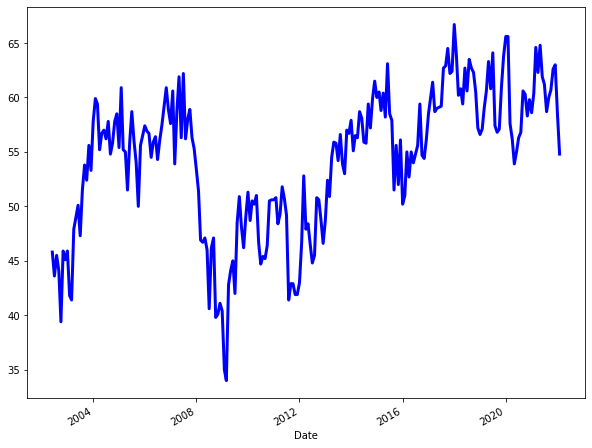

In [47]:
fig, ax = plt.subplots()
raw['Mean'].plot(ax=ax,figsize=(10,8),color='b',linewidth=3)